    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


C:\Users\User\AppData\Local\Temp\ipykernel_97732\1684760371.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = auto_df.corr()


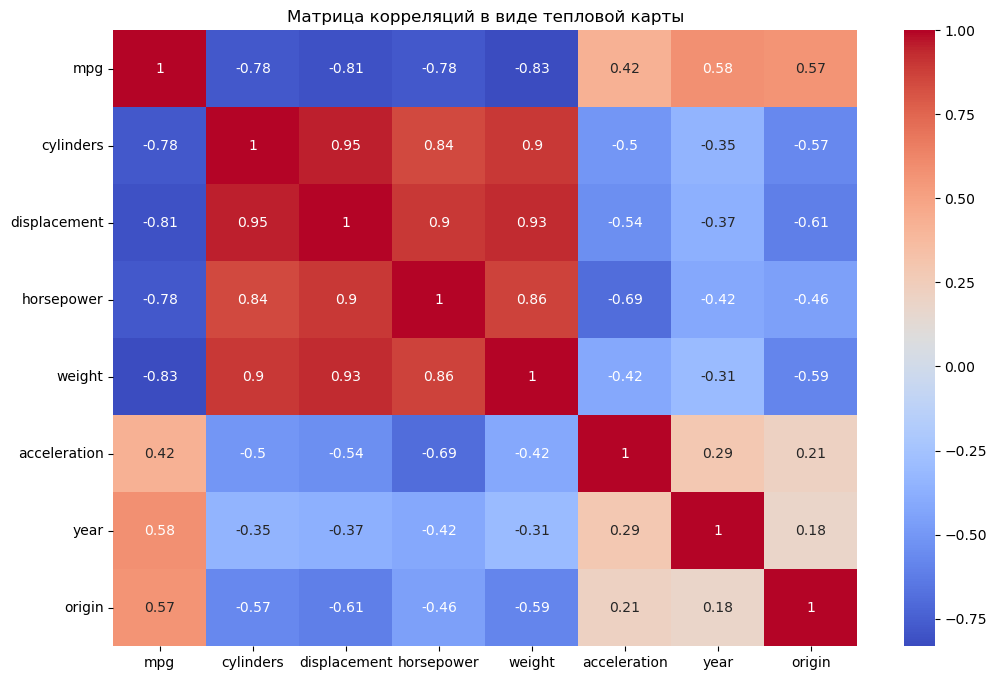

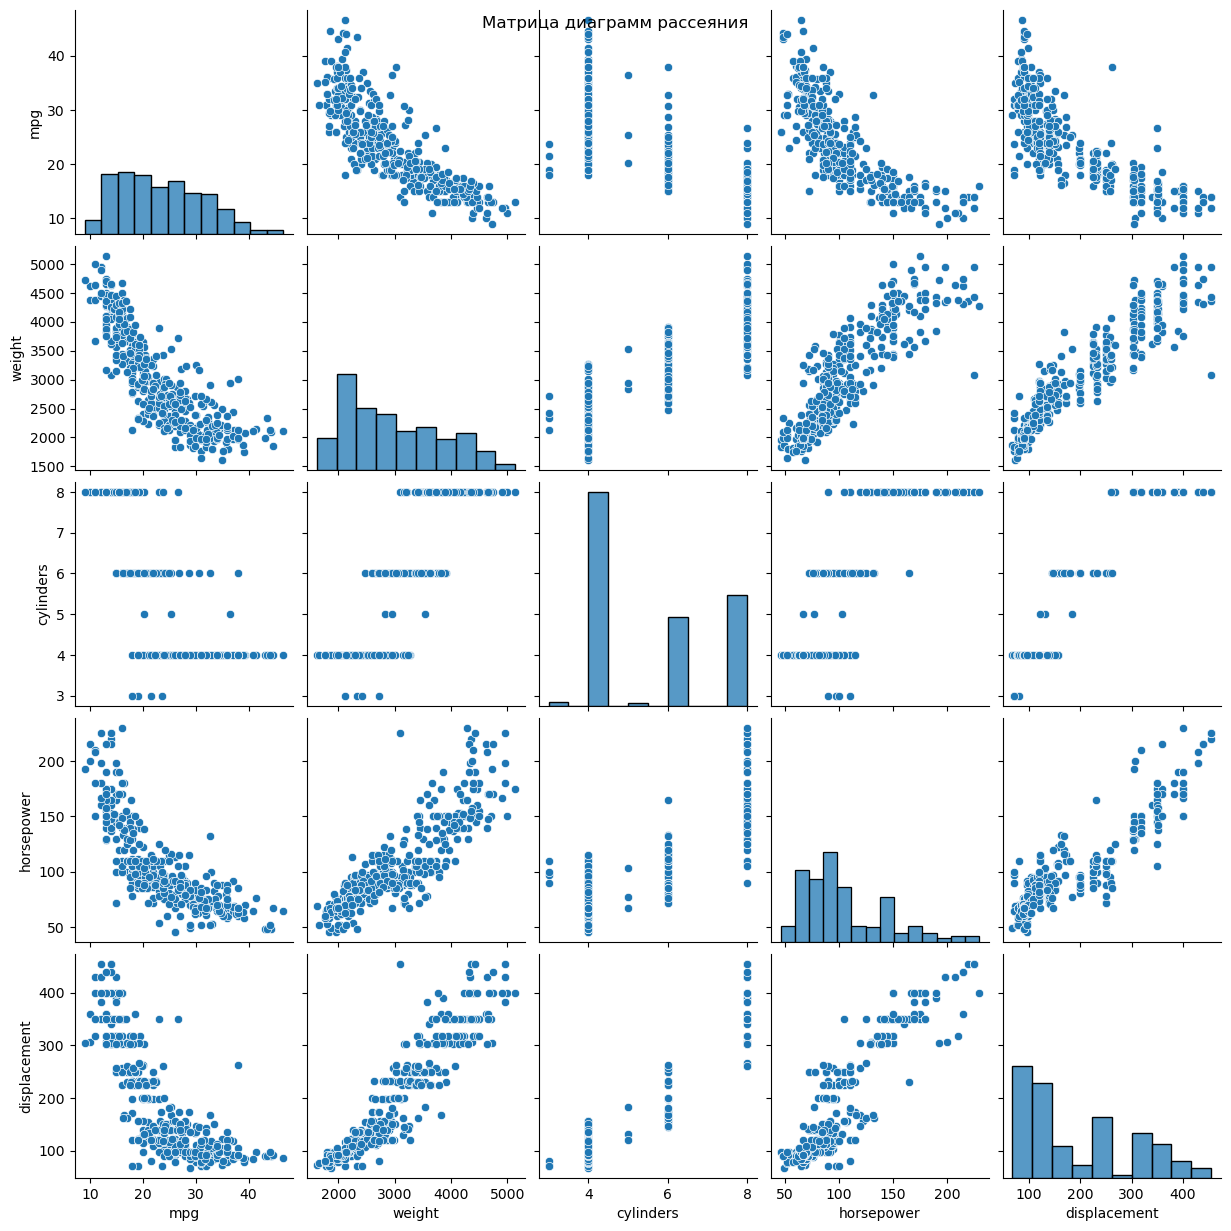

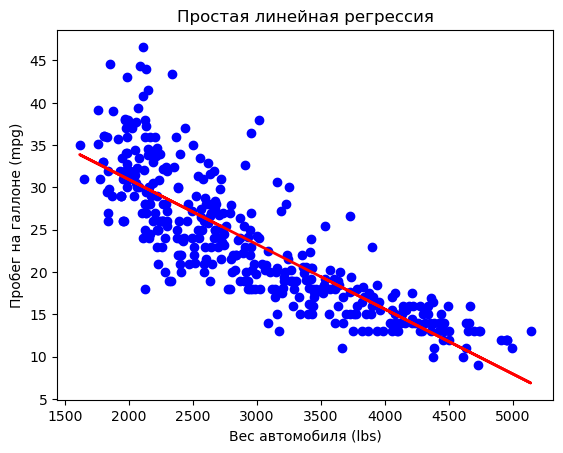

R^2 простой линейной модели: 0.69
R^2 расширенной модели: 0.71
Модель с одним параметром (вес автомобиля) описывает зависимость от целевой переменной хуже, чем модель с тремя параметрами (вес, объем двигателя, ускорение).


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# task1 ---------------------------------------------------------------
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv"
auto_df = pd.read_csv(data_url)
print(auto_df.head())

correlation_matrix = auto_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций в виде тепловой карты')
plt.show()

# task2 ---------------------------------------------------------------
sns.pairplot(auto_df[['mpg', 'weight', 'cylinders', 'horsepower','displacement']])
plt.suptitle('Матрица диаграмм рассеяния')
plt.show()

# task3 ---------------------------------------------------------------
X = auto_df[['weight']]
y = auto_df['mpg']

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title('Простая линейная регрессия')
plt.xlabel('Вес автомобиля (lbs)')
plt.ylabel('Пробег на галлоне (mpg)')
plt.show()

# task4 ---------------------------------------------------------------
r_squared = model.score(X, y)
print("R^2 простой линейной модели: {:.2f}".format(r_squared))

# task5 ---------------------------------------------------------------
X = auto_df[[ 'horsepower']]
y = auto_df['displacement']

model_extended = LinearRegression()
model_extended.fit(X, y)

r_squared_extended = model_extended.score(X, y)
print("R^2 расширенной модели: {:.2f}".format(r_squared_extended))

# task6 ---------------------------------------------------------------
print("Модель с одним параметром (вес автомобиля) описывает зависимость от целевой переменной хуже, чем модель с тремя параметрами (вес, объем двигателя, ускорение).")
